In [1]:
import pandas as pd
from pandas import Series, DataFrame 

In [2]:
#Set up the Titanic CSV files as a dataframe

titanic_df = pd.read_csv('train.csv')

#Preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
#We could also get the overall info for the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
# All good data analysis projects begin with trying to answer questions
#What do I want to achieve through this data sets 

In [5]:
"""1. Who were the passengers on the titanic 
2. What deck were the passengers on and how does that relate to their class
3. Where did the passengers come from
4. What factors aided in the passengers survival"""

'1. Who were the passengers on the titanic \n2. What deck were the passengers on and how does that relate to their class\n3. Where did the passengers come from\n4. What factors aided in the passengers survival'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

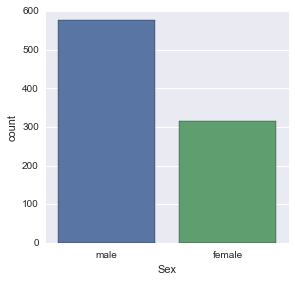

In [16]:
sns.factorplot('Sex',data=titanic_df, kind='count')

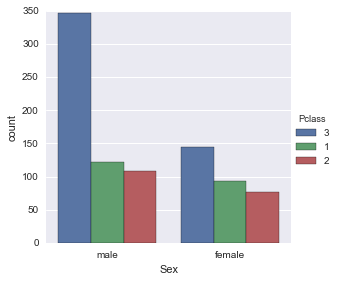

In [18]:
sns.factorplot('Sex', data=titanic_df, hue='Pclass',kind='count')

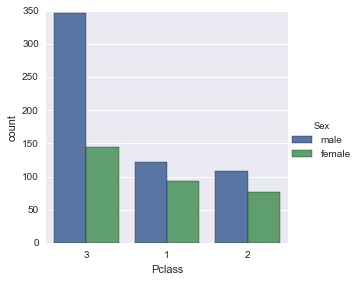

In [19]:
sns.factorplot('Pclass', data=titanic_df, hue='Sex',kind='count')

In [20]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [21]:
#You are creating a new column on the Titanic data frame called person
#Which will indicated whether the person is female,male or child
#We are doing this by grabbing the age and sex column values and applying
    #the function above


titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [22]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


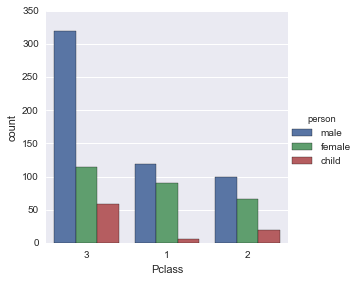

In [25]:
sns.factorplot('Pclass', data=titanic_df, hue='person', kind = 'count')

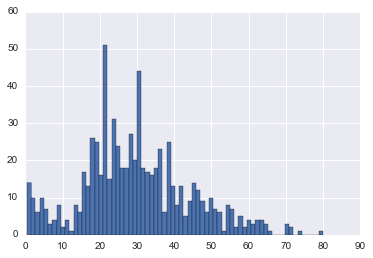

In [27]:
#Distribution of the ages using a histogram

titanic_df['Age'].hist(bins =70)

In [28]:
titanic_df['Age'].mean()

29.69911764705882

In [29]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64